In [295]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import visualizations as vis
import importlib
importlib.reload(vis)

%reload_ext autoreload
%autoreload 2


In [279]:
data = pd.read_csv('./data/2022-chp-pud.csv')
data = data.dropna(subset=['ID'])

borough_info = data.iloc[0:6]
community_info = data.iloc[6:]

communities_column = 'Name'
district = 'East Harlem'
parameter_1 = 'Self_Rep_Health'
parameter_2 = 'Fruit_Veg'
parameters = [parameter_1, parameter_2]

In [282]:
all_stats = []

for parameter in parameters:
    # Identify the row that corresponds to the given community. From that row, grab the value corresponding to the desired statistic.
    borough = community_info.loc[community_info[communities_column] == district]['Borough']
    local_stat = community_info.loc[community_info[communities_column] == district][parameter].values[0]
    borough_stat = borough_info.loc[borough_info[communities_column] == borough.values[0]][parameter].values[0]
    city_stat = borough_info.loc[borough_info[communities_column] == 'NYC'][parameter].values[0]

    names = ['NYC', borough.values[0], district]
    stats = [city_stat, borough_stat, local_stat]
    # names = [district, borough.values[0], 'NYC']
    # stats = [local_stat, borough_stat, city_stat]
        
    print(stats, names)
    print(city_stat)

    all_stats.append(stats)


[78.4, 82.3, 76.2] ['NYC', 'Manhattan', 'East Harlem']
78.4
[89.0, 90.0, 82.0] ['NYC', 'Manhattan', 'East Harlem']
89.0


([78.4, 82.3, 76.2], 'How residents feel about their own health as "good"')
([89.0, 90.0, 82.0], 'At least one serving of fruits or vegetables per day')


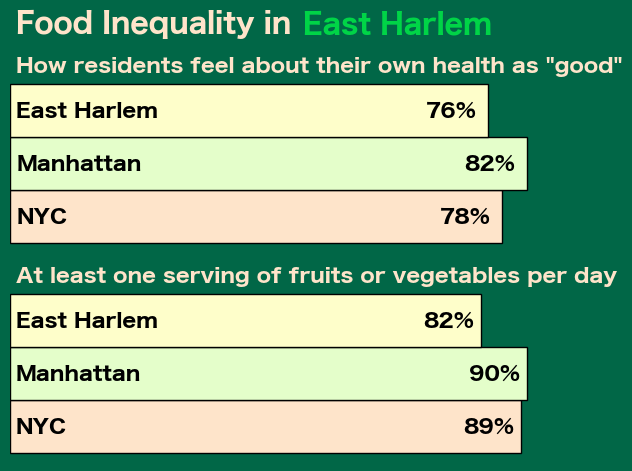

In [284]:
# https://www.geeksforgeeks.org/how-to-make-dropdown-menus-in-plotly/
# https://www.python-graph-gallery.com/5-control-width-and-space-in-barplots
# https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-on-horizontal-bars
# https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/

x_pos = [0, 0.5, 1]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), facecolor = '#016747') 

for i, param in enumerate(zip(all_stats, ['How residents feel about their own health as "good"', 'At least one serving of fruits or vegetables per day'])):
    print(param)
    bars = ax[i].barh(x_pos, width = param[0], height = 0.5, color = ['#fee4ca', '#e4feca', '#fefeca'], edgecolor = 'black', linewidth = 1)
    # Create names on the x-axis

    ax[i].set_yticks(x_pos, names)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].get_xaxis().set_ticks([])
    plt.setp(ax[i].get_xticklabels(), visible=False)

    # get rid of y ticks
    ax[i].get_yaxis().set_ticks([])
    plt.setp(ax[i].get_yticklabels(), visible=False)

    # ax[i].set_title(f"Food inequality in {district}", fontname = "Hiragino Sans", fontweight="bold", color = '#fefeca', fontsize = 18)
    # ax[i].set_title(param, fontname = "Hiragino Sans", fontweight="bold", color = '#fefeca', fontsize = 18)
    ax[i].text(1, 1.35, param[1], fontsize = 15, color = '#fee4ca', fontname = "Hiragino Sans", fontweight="bold")

    ax[i].set_facecolor('#016747')

    if False:
        ax[i].bar_label(bars, fmt = '%g%%' ,padding = 2)
        _ = ax[i].vlines(x=[city_stat], ymin=-0.5, ymax= 1, colors='r')
        plt.text(city_stat + 1, -0.5, f'NYC: {city_stat}%', fontsize = 10, color = 'r')

    for j in range(len(names)):
        # Add area names to bars
        ax[i].text(1, x_pos[j] - 0.07, f'{names[j]}', fontsize = 15, color = 'black', fontname = "Hiragino Sans", fontweight="bold")
        # Add percentages to bars ->
        ax[i].text(param[0][j] - 10, x_pos[j] - 0.07, f'{round(param[0][j])}%', fontsize = 15, color = 'black', fontname = "Hiragino Sans", fontweight="bold")

# plt.suptitle(f"Food inequality in {district}", x = 0.52, y = 1.01, fontname = "Hiragino Sans", fontweight="bold", color = '#fee4ca', fontsize = 20)
plt.text(1 , 3.71, "Food Inequality in ", fontname = "Hiragino Sans", fontweight="bold", color = '#fee4ca', fontsize = 20)
plt.text(51 , 3.71, f"{district}", fontname = "Hiragino Sans", fontweight="bold", color = '#00d447', fontsize = 20)

plt.show()

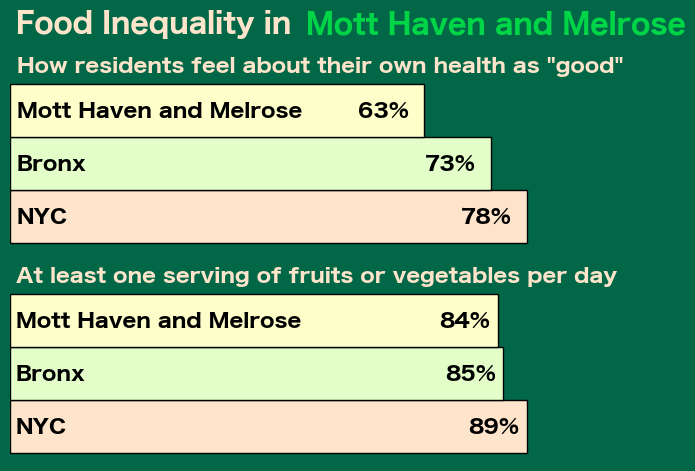

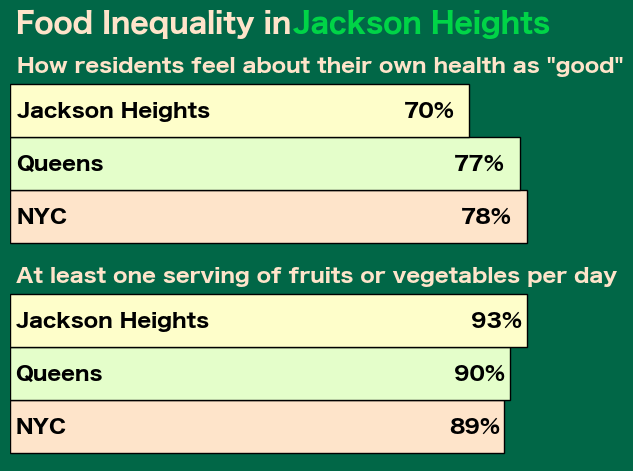

In [299]:
vis.plot_inequality(community_info, borough_info, district_name = "Mott Haven and Melrose")
vis.plot_inequality(community_info, borough_info, district_name = "Jackson Heights")